In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('2024-07-23-washington-post-police-shootings-export.csv')

In [3]:
# Display the first few rows
print(df.head())

# Check for null values and data types
print(df.info())

         date                name   age gender    armed      race     city  \
0  2015-01-02    Lewis Lee Lembke  47.0   male      gun     White    Aloha   
1  2015-01-02          Tim Elliot  53.0   male      gun     Asian  Shelton   
2  2015-01-03  John Paul Quintero  23.0   male  unarmed  Hispanic  Wichita   
3  2015-01-04   Kenneth Joe Brown  18.0   male      gun     White  Guthrie   
4  2015-01-04   Michael Rodriguez  39.0   male    other  Hispanic    Evans   

  state flee  body_camera  signs_of_mental_illness  \
0    OR  not        False                    False   
1    WA  not        False                     True   
2    KS  not        False                    False   
3    OK  not        False                    False   
4    CO  not        False                    False   

              police_departments_involved  
0  Washington County Sheriff's Office, OR  
1       Mason County Sheriff's Office, WA  
2           Wichita Police Department, KS  
3             Oklahoma Highway

In [4]:
# Fill missing values in critical columns
df['name'].fillna('Unknown', inplace=True)          # Categorical field
df['age'].fillna(df['age'].median(), inplace=True)  # Numeric field; replaced with median
df['gender'].fillna('Unknown', inplace=True)        # Categorical field
df['race'].fillna('Unknown', inplace=True)          # Categorical field
df['armed'].fillna('Unarmed', inplace=True)         # Categorical field

C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\2231415386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)          # Categorical field
C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\2231415386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [8]:
print(df.info())  # Ensure there are no missing values
print(df.duplicated().sum())  # Check for duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         9893 non-null   datetime64[ns]
 1   name                         9893 non-null   object        
 2   age                          9893 non-null   float64       
 3   gender                       9893 non-null   object        
 4   armed                        9893 non-null   object        
 5   race                         9893 non-null   object        
 6   city                         9821 non-null   object        
 7   state                        9893 non-null   object        
 8   flee                         8548 non-null   object        
 9   body_camera                  9893 non-null   bool          
 10  signs_of_mental_illness      9893 non-null   bool          
 11  police_departments_involved  9892 non-null 

In [9]:
df.to_csv('cleaned_police_shootings_data.csv', index=False)

In [10]:
# Checking missing values and percentages
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Dropping duplicates if any
df_cleaned = df.drop_duplicates()

# Handle missing values:
# - 'name': we'll fill missing names as 'Unknown'
# - 'age': we'll fill missing ages with the median age
# - 'gender', 'armed', 'city', 'flee': fill missing with 'Unknown' or 'Unspecified'

df_cleaned['name'].fillna('Unknown', inplace=True)
df_cleaned['age'].fillna(df['age'].median(), inplace=True)
df_cleaned['gender'].fillna('Unknown', inplace=True)
df_cleaned['armed'].fillna('Unspecified', inplace=True)
df_cleaned['city'].fillna('Unknown', inplace=True)
df_cleaned['flee'].fillna('Unspecified', inplace=True)

# Confirming the missing data is handled
cleaned_missing_values = df_cleaned.isnull().sum()

missing_percentages, cleaned_missing_values


C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\1258574560.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['name'].fillna('Unknown', inplace=True)
C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\1258574560.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

(date                            0.000000
 name                            0.000000
 age                             0.000000
 gender                          0.000000
 armed                           0.000000
 race                            0.000000
 city                            0.727787
 state                           0.000000
 flee                           13.595472
 body_camera                     0.000000
 signs_of_mental_illness         0.000000
 police_departments_involved     0.010108
 year                            0.000000
 month                           0.000000
 dtype: float64,
 date                           0
 name                           0
 age                            0
 gender                         0
 armed                          0
 race                           0
 city                           0
 state                          0
 flee                           0
 body_camera                    0
 signs_of_mental_illness        0
 police_departments_i

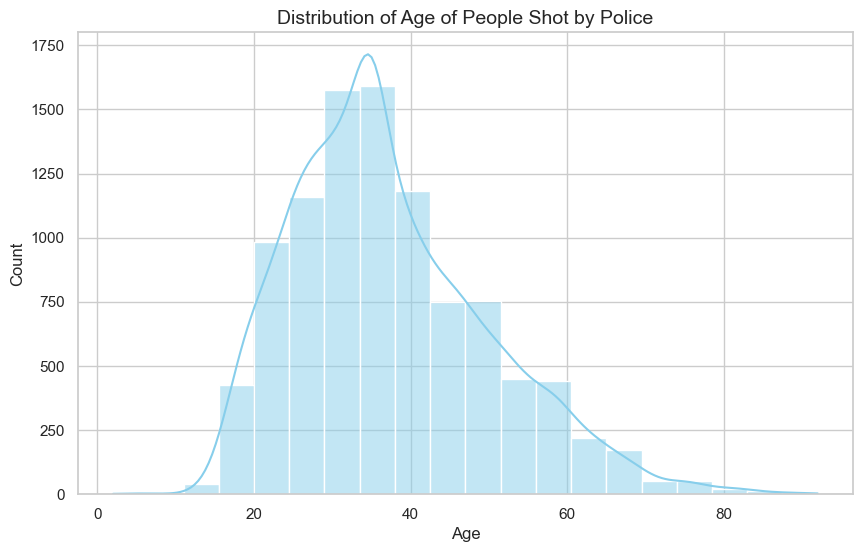

C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\3854669182.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='race', data=df_cleaned, palette='Set2', order=df_cleaned['race'].value_counts().index)


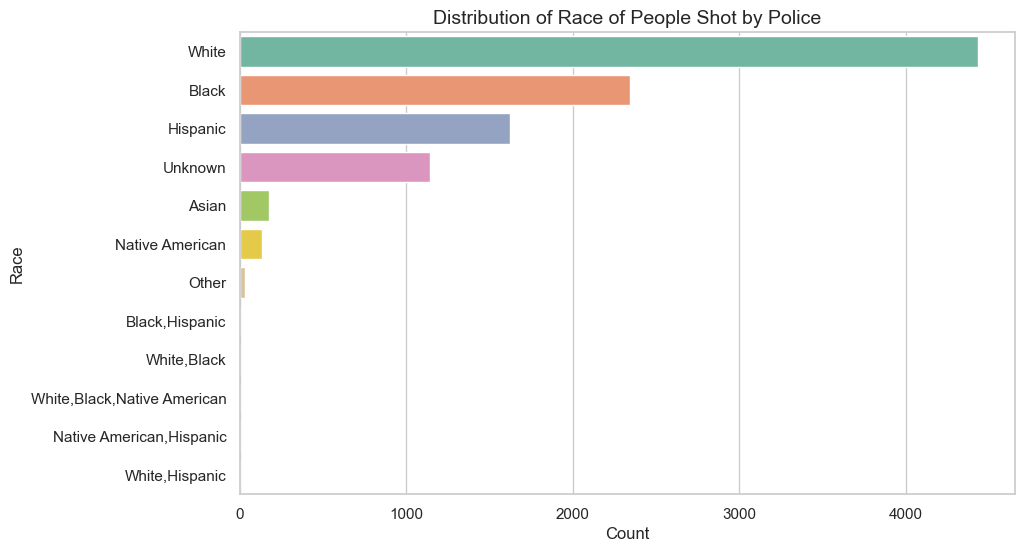

C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\3854669182.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_cleaned, palette='muted')


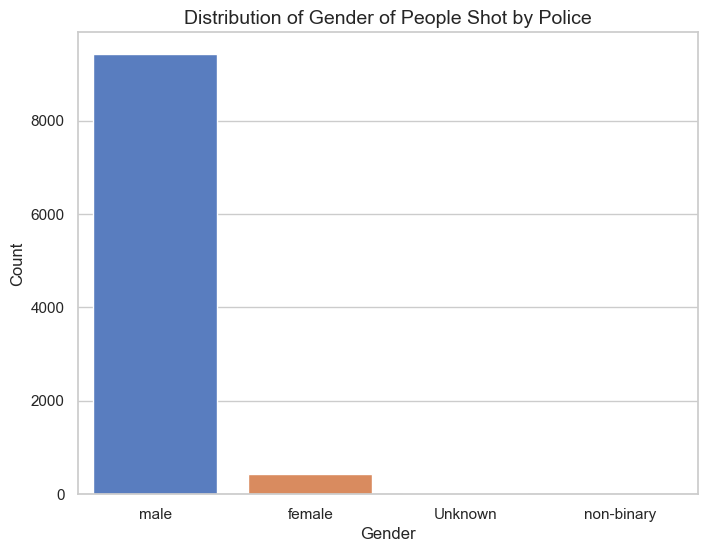

C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\3854669182.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='armed', data=df_cleaned, palette='coolwarm', order=df_cleaned['armed'].value_counts().index[:10])


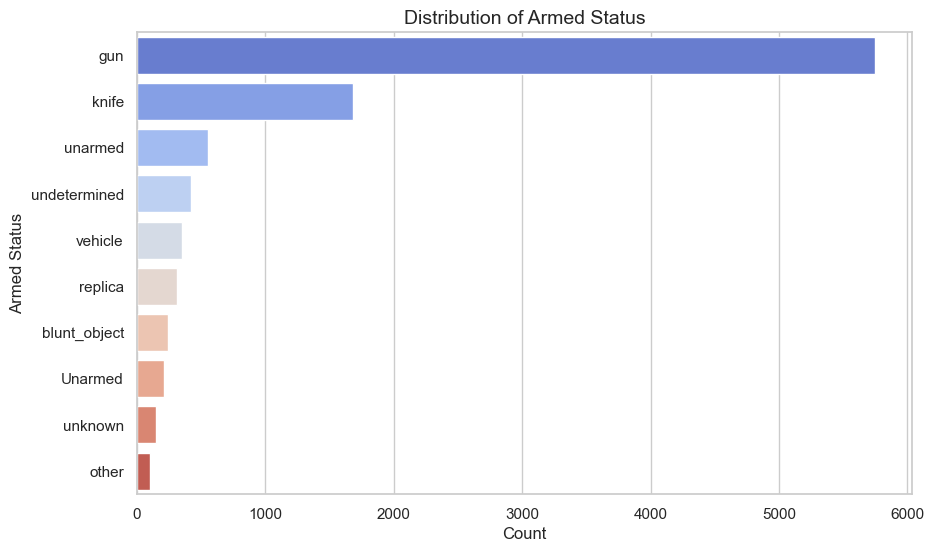

(count    9893.000000
 mean       37.315981
 std        12.687654
 min         2.000000
 25%        28.000000
 50%        35.000000
 75%        45.000000
 max        92.000000
 Name: age, dtype: float64,
 race
 White                          4432
 Black                          2346
 Hispanic                       1623
 Unknown                        1144
 Asian                           175
 Native American                 135
 Other                            31
 Black,Hispanic                    2
 White,Black                       2
 White,Black,Native American       1
 Native American,Hispanic          1
 White,Hispanic                    1
 Name: count, dtype: int64,
 gender
 male          9421
 female         442
 Unknown         28
 non-binary       2
 Name: count, dtype: int64,
 armed
 gun                          5748
 knife                        1683
 unarmed                       551
 undetermined                  421
 vehicle                       351
 replica            

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting style
sns.set(style="whitegrid")

# Basic statistics for age, and count distributions for race, gender, and armed status
age_stats = df_cleaned['age'].describe()
race_counts = df_cleaned['race'].value_counts()
gender_counts = df_cleaned['gender'].value_counts()
armed_counts = df_cleaned['armed'].value_counts()

# 1. Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age of People Shot by Police', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Distribution of race
plt.figure(figsize=(10, 6))
sns.countplot(y='race', data=df_cleaned, palette='Set2', order=df_cleaned['race'].value_counts().index)
plt.title('Distribution of Race of People Shot by Police', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

# 3. Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_cleaned, palette='muted')
plt.title('Distribution of Gender of People Shot by Police', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4. Distribution of armed status
plt.figure(figsize=(10, 6))
sns.countplot(y='armed', data=df_cleaned, palette='coolwarm', order=df_cleaned['armed'].value_counts().index[:10])
plt.title('Distribution of Armed Status', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Armed Status')
plt.show()

age_stats, race_counts, gender_counts, armed_counts


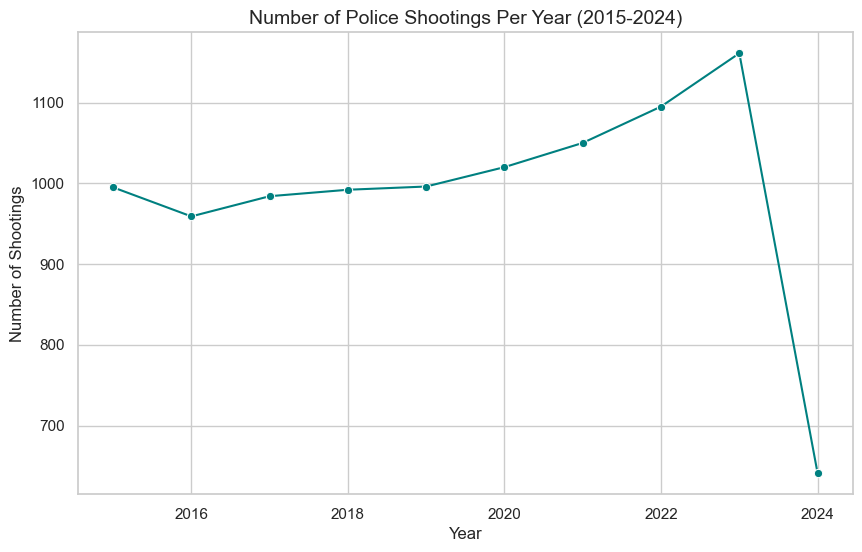

C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\1802103270.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='coolwarm')


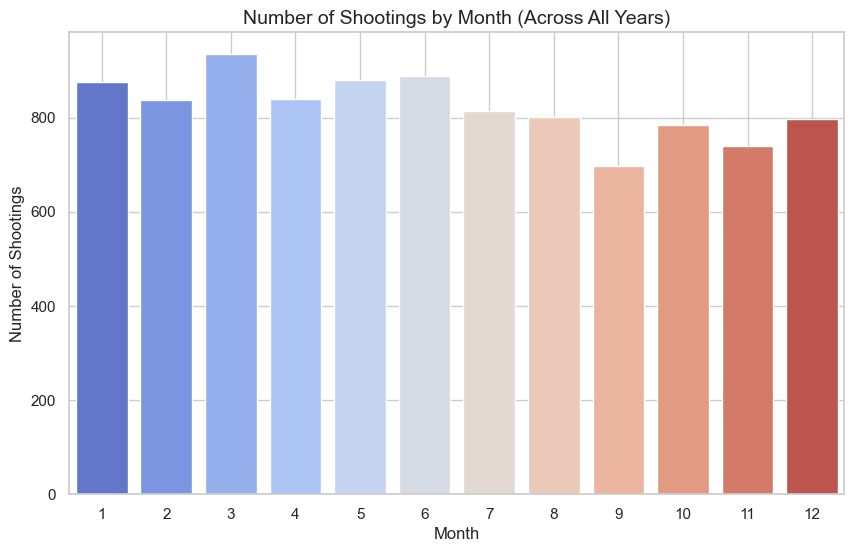

(year
 2015     995
 2016     959
 2017     984
 2018     992
 2019     996
 2020    1020
 2021    1050
 2022    1095
 2023    1161
 2024     641
 Name: count, dtype: int64,
 month
 1     875
 2     837
 3     935
 4     840
 5     881
 6     889
 7     815
 8     801
 9     697
 10    785
 11    740
 12    798
 Name: count, dtype: int64)

In [13]:
# Convert the 'date' column to datetime for time-series analysis
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract year and month from the date for trend analysis
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month

# 1. Number of shootings by year
yearly_trends = df_cleaned['year'].value_counts().sort_index()

# 2. Number of shootings by month across all years
monthly_trends = df_cleaned['month'].value_counts().sort_index()

# Plotting the yearly trend of shootings
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o', color='teal')
plt.title('Number of Police Shootings Per Year (2015-2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.show()

# Plotting the monthly trend of shootings
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='coolwarm')
plt.title('Number of Shootings by Month (Across All Years)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.show()

yearly_trends, monthly_trends


<Axes: title={'center': 'Number of Shootings Per Year'}, xlabel='year', ylabel='Number of Shootings'>

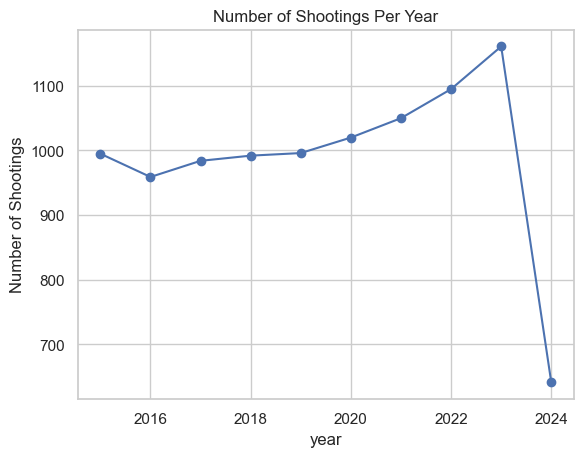

In [14]:
yearly_trends = df_cleaned['year'].value_counts().sort_index()
yearly_trends.plot(kind='line', marker='o', title='Number of Shootings Per Year', ylabel='Number of Shootings')


<Axes: title={'center': 'Number of Shootings by Month'}, xlabel='month', ylabel='Number of Shootings'>

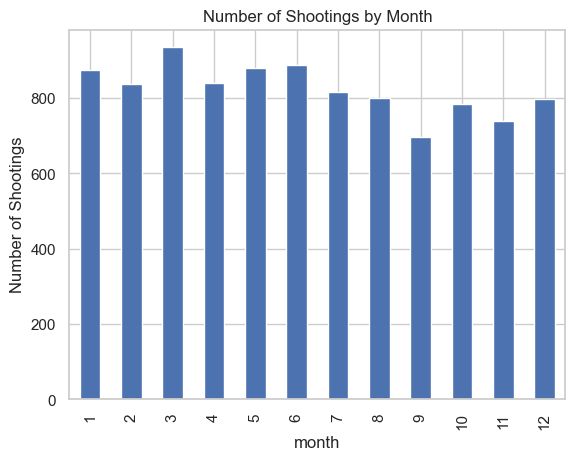

In [15]:
monthly_trends = df_cleaned['month'].value_counts().sort_index()
monthly_trends.plot(kind='bar', title='Number of Shootings by Month', ylabel='Number of Shootings')


<Axes: xlabel='signs_of_mental_illness'>

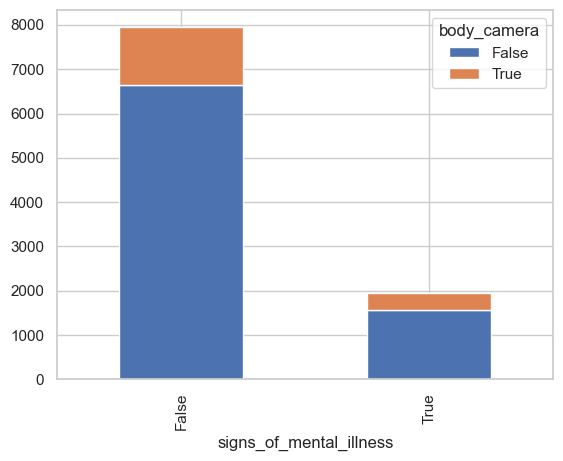

In [16]:
df_cleaned.groupby(['signs_of_mental_illness', 'body_camera']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='signs_of_mental_illness'>

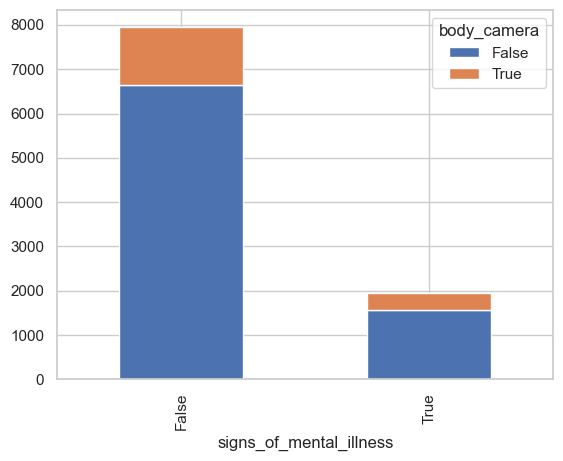

In [17]:
df_cleaned.groupby(['signs_of_mental_illness', 'body_camera']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='signs_of_mental_illness'>

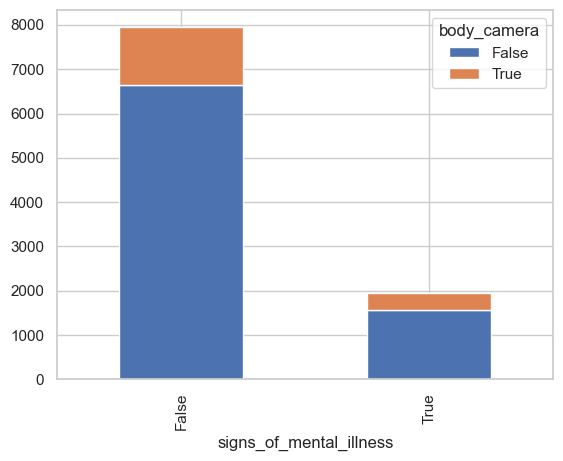

In [18]:
df_cleaned.groupby(['signs_of_mental_illness', 'body_camera']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='race'>

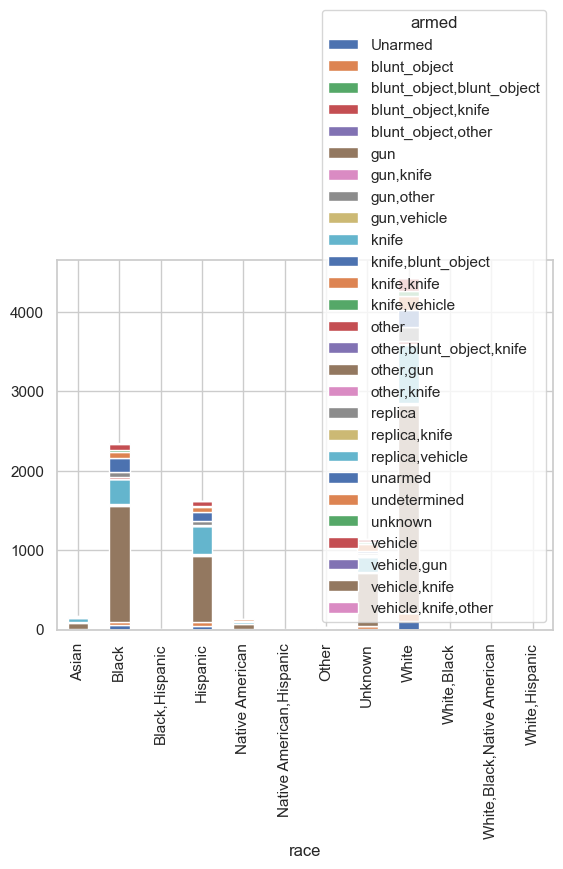

In [19]:
df_cleaned.groupby(['race', 'armed']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='flee'>

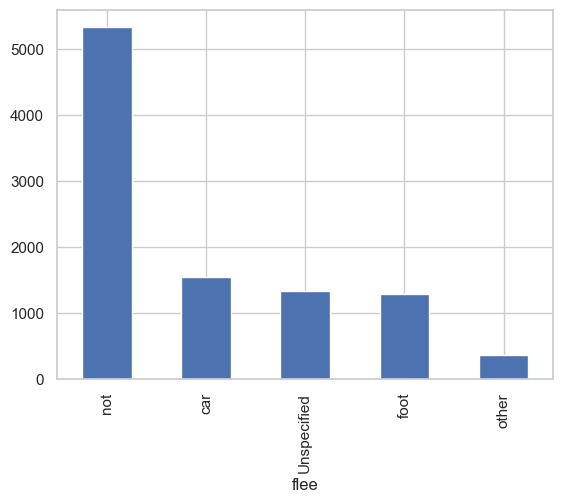

In [20]:
df_cleaned['flee'].value_counts().plot(kind='bar')


In [21]:
yearly_trends = df_cleaned['year'].value_counts().sort_index()
monthly_trends = df_cleaned['month'].value_counts().sort_index()


<Axes: xlabel='signs_of_mental_illness'>

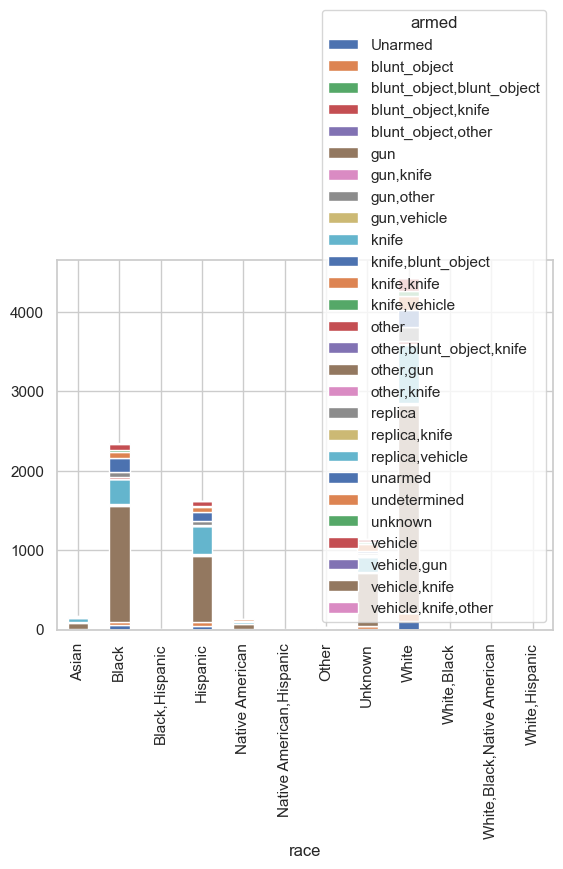

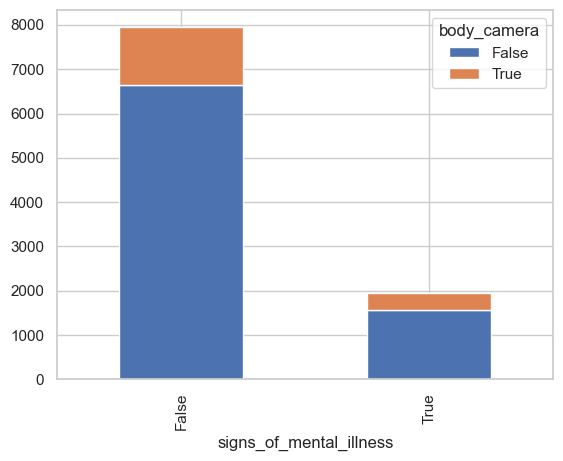

In [22]:
df_cleaned.groupby(['race', 'armed']).size().unstack().plot(kind='bar', stacked=True)
df_cleaned.groupby(['signs_of_mental_illness', 'body_camera']).size().unstack().plot(kind='bar', stacked=True)


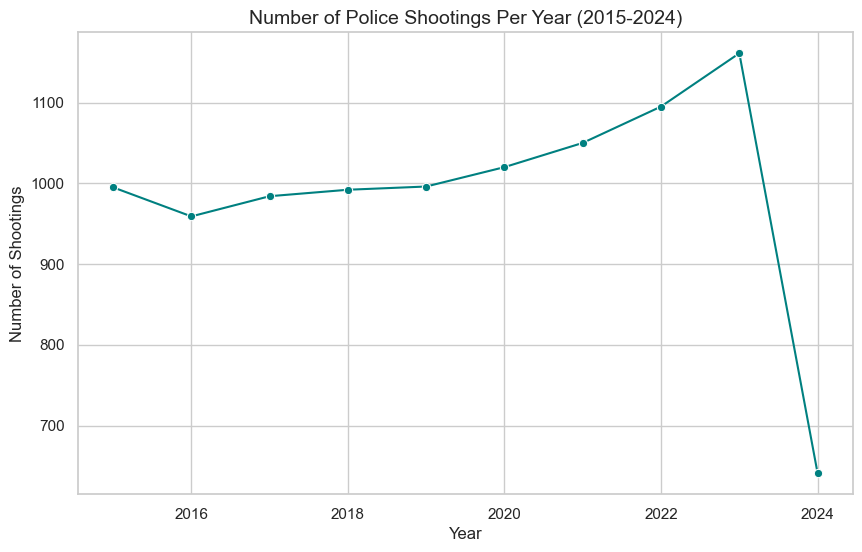

In [23]:
# Number of shootings by year
yearly_trends = df_cleaned['year'].value_counts().sort_index()

# Plotting the yearly trend of shootings
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o', color='teal')
plt.title('Number of Police Shootings Per Year (2015-2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(True)
plt.show()


C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\4279210615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='race', data=df_cleaned, palette='Set2', order=df_cleaned['race'].value_counts().index)


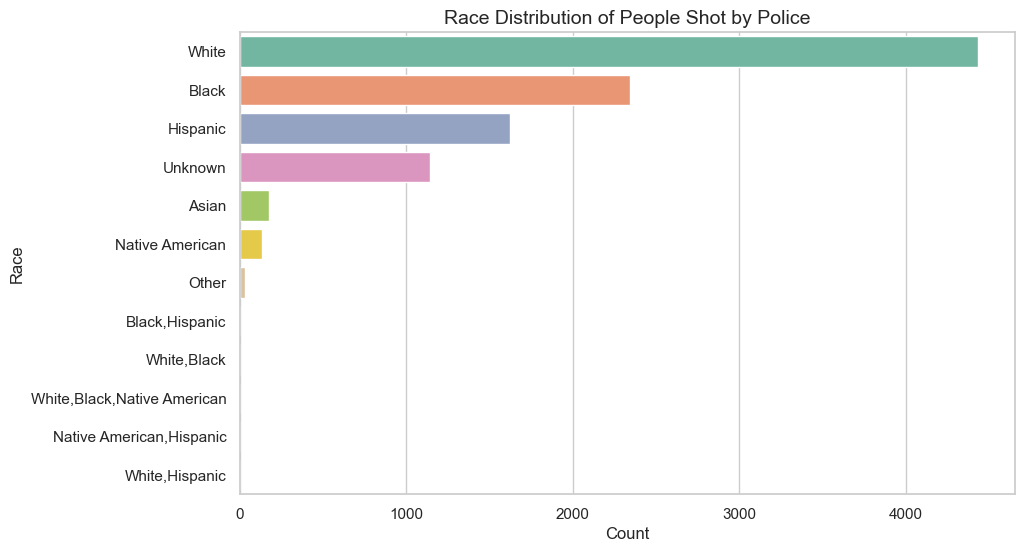

In [24]:
# Plot the race distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='race', data=df_cleaned, palette='Set2', order=df_cleaned['race'].value_counts().index)
plt.title('Race Distribution of People Shot by Police', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()


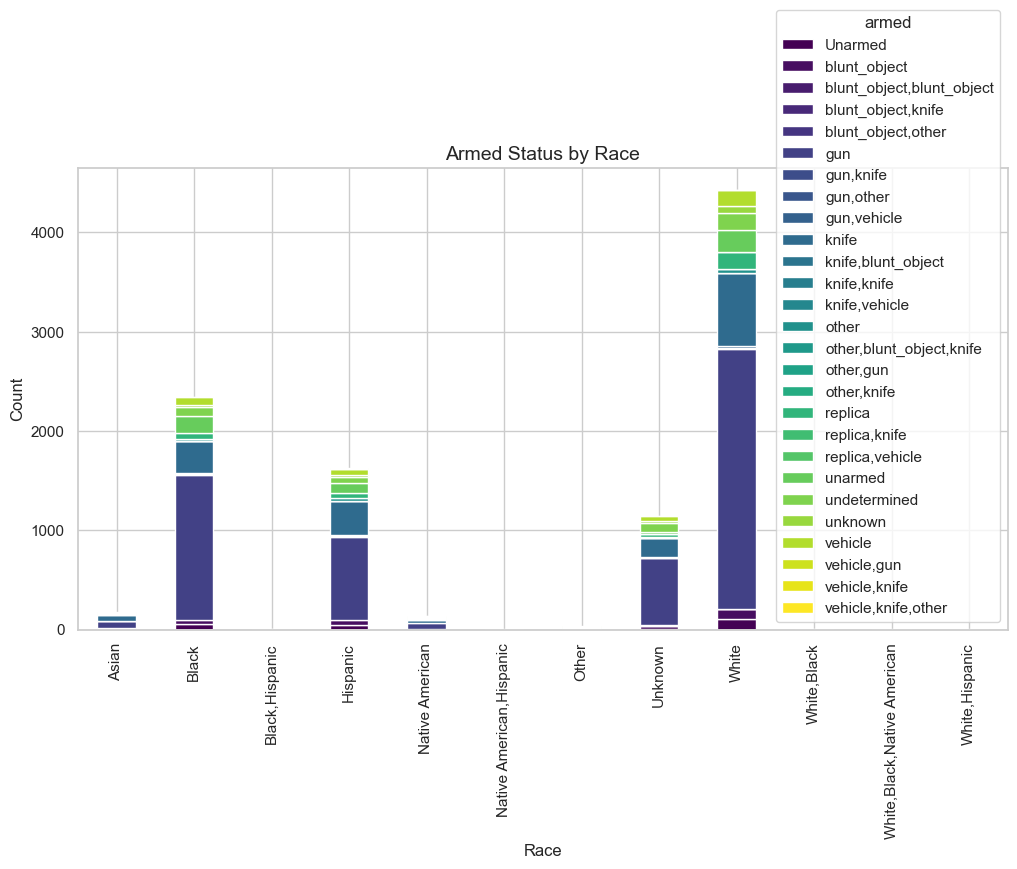

In [25]:
# Compare armed status across races
df_cleaned.groupby(['race', 'armed']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Armed Status by Race', fontsize=14)
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


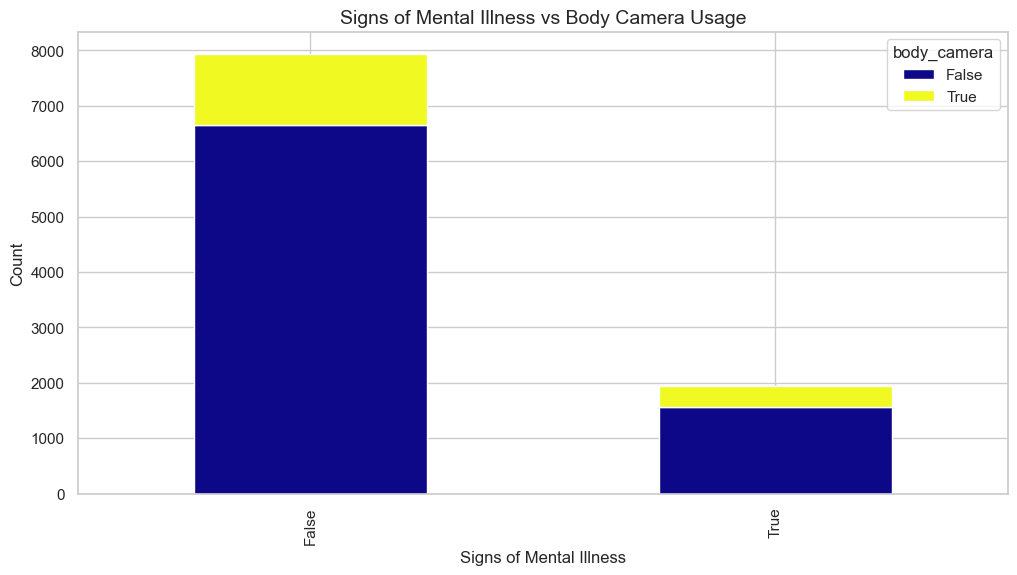

In [26]:
# Mental illness and body camera usage
df_cleaned.groupby(['signs_of_mental_illness', 'body_camera']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Signs of Mental Illness vs Body Camera Usage', fontsize=14)
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.show()


C:\Users\sufia\AppData\Local\Temp\ipykernel_10700\3147968257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='coolwarm')


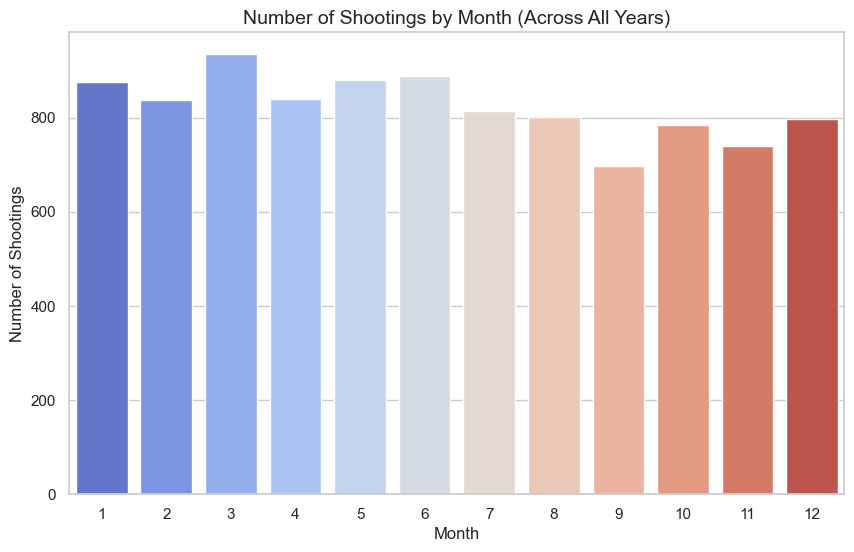

In [27]:
# Number of shootings by month
monthly_trends = df_cleaned['month'].value_counts().sort_index()

# Plotting the monthly trend of shootings
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='coolwarm')
plt.title('Number of Shootings by Month (Across All Years)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.show()
